In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [16]:
def aggregate_and_plot_demand(files, labels, colors, column, xgroup=None):
    """Plot bar plot for aggregated demand column for one or multible files over a column.
    
        Parameters:
        -----------
        files (list):  List of one ore more csv file paths.
        labels (list): List of labels for multible files.
        colors (list): List of colors for bars of a file.
        column (str):  Column which should be grouped for aggregation.
        xgroup (list): Group values of column (group on x-axis) in a range. 
                       xgroup[0]: Minimum value in column
                       xgroup[1]: Maximum value in column
                       xgroup[2]: Steps for grouping column
    """
    for i, csv_file in enumerate(files):
        df = pd.read_csv(csv_file)
        
        if xgroup is not None:
            # For example for the temperature we want grouped by whole degrees (integers)
            bins = np.arange(xgroup[0], xgroup[1]+xgroup[2], xgroup[2])
            df['col_group'] = pd.cut(df[column], bins)
            demand = df.groupby('col_group')['demand'].sum()
        else:    
            demand = df.groupby(column)['demand'].sum()
            
        demand.plot(kind='bar',color=colors[i], label=labels[i], position=i, width=0.4, figsize=(7, 5), fontsize=12)

    plt.xlabel(column, fontsize=14)
    plt.ylabel('Demand', fontsize=14)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(f'figures/demand_{column}.png')

    plt.show()



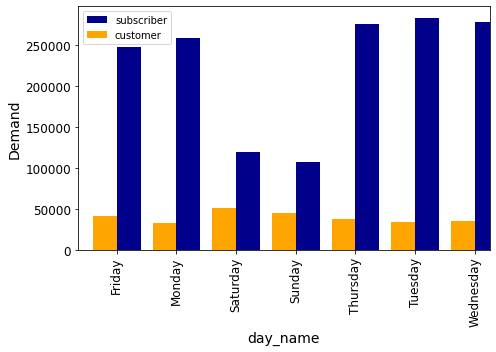

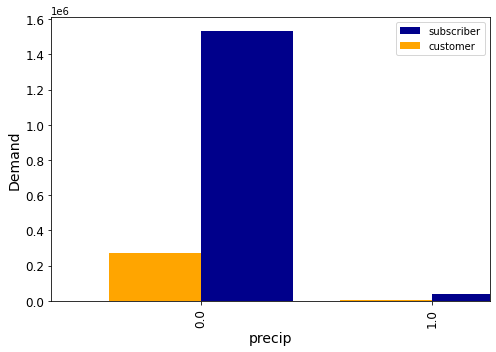

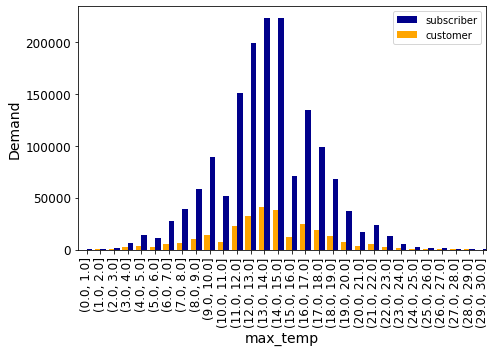

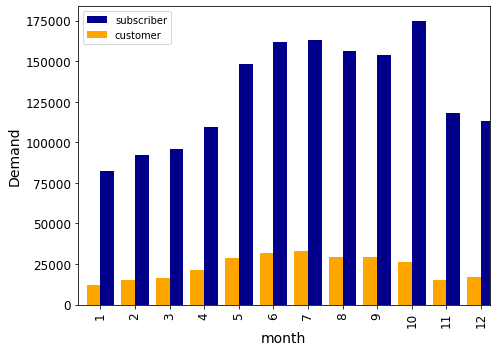

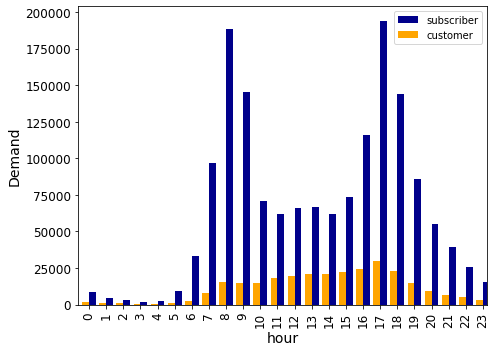

In [17]:
aggregate_and_plot_demand(["data/subscriber_demand.csv", "data/customer_demand.csv"], ["subscriber", "customer"], ["darkblue", "orange"], 'day_name')
aggregate_and_plot_demand(["data/subscriber_demand.csv", "data/customer_demand.csv"], ["subscriber", "customer"], ["darkblue", "orange"], 'precip')
aggregate_and_plot_demand(["data/subscriber_demand.csv", "data/customer_demand.csv"], ["subscriber", "customer"], ["darkblue", "orange"], 'max_temp', xgroup=[0.0, 30.0, 1])
aggregate_and_plot_demand(["data/subscriber_demand.csv", "data/customer_demand.csv"], ["subscriber", "customer"], ["darkblue", "orange"], 'month')
aggregate_and_plot_demand(["data/subscriber_demand.csv", "data/customer_demand.csv"], ["subscriber", "customer"], ["darkblue", "orange"], 'hour')




In [14]:
def plot_demand(file_path, col1, col2, col3, agg_col):
    """Plot demand of every hour in the dataset.
    
        Parameters:
        -----------
        file_path (str): File path to csv file.
        col1 (str): First column to sort (month).
        col2 (str): Second column to sort (day).
        col3 (str): Third column to sort (hour).
        agg_col (str): Demand column.
    
    """
    df = pd.read_csv(file_path)
    df = df.sort_values(by=[col1, col2, col3])
    
    plt.figure(figsize=(7, 5))
    plt.scatter(x=range(len(df.index)), y=df[agg_col], color="darkblue")
    
    plt.xlabel("Sorted Data Points", fontsize=14)
    plt.ylabel('Demand', fontsize=14)
    plt.title('Demand of Bike Rental every hour')
    plt.tight_layout()
    
    plt.savefig('figures/demand_all_every_hour.png')

    plt.show()

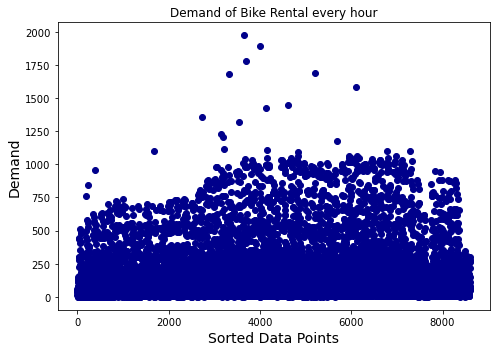

In [15]:
plot_demand("data/all_demand.csv", "month", "day", "hour", "demand")


In [12]:
def plot_histogramm_demand(file_path):
    """Plot histogramm to get the distribution of the demand.
    
        Parameters:
        -----------
        file_path (str): File path to csv file.
    
    """
    df = pd.read_csv(file_path)
    
    plt.figure(figsize=(7, 5))
    # Plot the histogram
    plt.hist(df['demand'], bins=75, color="darkblue", width=20)

    # Add labels and title
    plt.xlabel('Demand', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    #plt.title('Distribution of Bike Rental Demand')
    
    plt.savefig('figures/demand_distribution.png')

    # Show the plot
    plt.show()
        

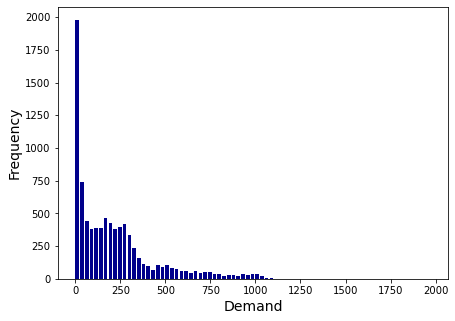

In [13]:
plot_histogramm_demand("data/all_demand.csv")